# **SPIRATEC CUMMINS FILTERS**: First Analysis

### **Author**: PhD Daniel Diaz-Almeida

#### **Task 1**: _To determine the feasibility to stablish a correlation between measured vital signs and filter massses_

## Introduction

In this report, a dataset of different measurements of the Spiratec Filters has been assessed.

The porpuse of this analysis has been to determine the feasibility to stablish a relationship between measured vital signs and filter masses(kg). In order to perform the assessment, the filter vital signs data was imported from a *.csv file into a DataFrame which had more han 1.2MM rows (observations) and 74 attributes ranging from the adquisition date to the escape gas tempeture (EGT).

The data presents a good distribution and good enough observations to perform an estimation 

In [1]:
import numpy as np
import pandas as pd

In [2]:
file = "combinedFilters_csv.csv"
%time filt_df = pd.read_csv(file, delimiter=',')
filt_df.shape

Wall time: 6.82 s


(1295116, 74)

In [3]:
newcols = {"ESN":"ESN",
           "AVL":"AVL",
           "Vehículo":"Vehicle",
           "Fecha Servidor":"Serv Date",
           "Fecha AVL":"AVL Date",
           "RPM":"RPM",
           "Pedal":"Pedal",
           "F. de Carga":"Load F",
           "Potencia":"Power",
           "Estado Motor":"Eng state",
           "Engine Torque Mode ()":"Eng Torque Mode",
           "Actual Percent Torque (%)":"Actual Torque (%)",
           "Actual Speed (RPM)":"ActSpeed (RPM)",
           "Accelerator position (%)":"AccelPosition (%)",
           "Percent Load At Current Speed (%)":"Load at CurrSpeed (%)",
           "Fuel rate (L/h)":"Fuel rate (L/h)",
           "Barometric Pressure (PSI)":"Bar Pressure (PSI)",
           "IMP-LB (PSI)":"IMP-LB (PSI)",
           "IMT-LBF (F)":"IMT-LBF (F)",
           "EGT-AV (F)":"EGT-AV (F)",
           "Battery potential (V)":"Battery pot (V)",
           "Coolant temperature (F)":"Coolant T (F)",
           "Fuel Temperature (F)":"Fuel T (F)",
           "Engine Oil Temperature (F)":"EngOil T (F)",
           "Injector Metering (PSI)":"Inject Met (PSI)",
           "Injector Timing (PSI)":"Inj Timing (PSI)",
           "Pre-filter Oil Pressure (PSI)":"Pre-filtOil Press (PSI)",
           "Instantaneous Estimated Brake Power (HP)":"InstantEst B-Power (HP)",
           "IMT-LBR (F)":"IMT-LBR (F)",
           "IMT-RBF (F)":"IMT-RBF (F)",
           "IMT-RBR (F)":"IMT-RBR (F)",
           "IMP-RB (PSI)":"IMP-RB (PSI)",
           "IMP-RB (MCRS) (PSI)":"IMP-RB (MCRS) (PSI)",
           "Oil Differential Pressure (PSI)":"OilDiff Press (PSI)",
           "Ecu temperature (F)":"Ecu T (F)",
           "EGT-01 (F)":"EGT-01 (F)",
           "EGT-02 (F)":"EGT-02 (F)",
           "EGT-03 (F)":"EGT-03 (F)",
           "EGT-04 (F)":"EGT-04 (F)",
           "EGT-05 (F)":"EGT-05 (F)",
           "EGT-06 (F)":"EGT-06 (F)",
           "EGT-07 (F)":"EGT-07 (F)",
           "EGT-08 (F)":"EGT-08 (F)",
           "EGT-09 (F)":"EGT-09 (F)",
           "EGT-10 (F)":"EGT-10 (F)",
           "EGT-11 (F)":"EGT-11 (F)",
           "EGT-12 (F)":"EGT-12 (F)",
           "EGT-13 (F)":"EGT-13 (F)",
           "EGT-14 (F)":"EGT-14 (F)",
           "EGT-15 (F)":"EGT-15 (F)",
           "EGT-16 (F)":"EGT-16 (F)",
           "Crankcase Pressure (HPI) (in-H2O)":"CC Press (HPI) (in-H2O)",
           "Engine Oil Level (%)":"EngOil Level (%)",
           "Post Oil Filter (PSI)":"PostOil Filt (PSI)",
           "Rifle Oil Pressure (PSI)":"RifleOil Press (PSI)",
           "Coolant Pressure (PSI)":"Coolant Press (PSI)",
           "Ambient Temperature (F)":"Ambient T (F)",
           "EGT-17 (F)":"EGT-17 (F)",
           "EGT-18 (F)":"EGT-18 (F)",
           "IMT-LBM (F)":"IMT-LBM (F)",
           "IMT-RBM (F)":"IMT-RBM (F)",
           "Remote accelerator pedal position (%)":"RemoAccelPedal Pos (%)",
           "Engine Pre-filter Oil Pressure (Extended Range) (PSI)":"EngPre-filterOil Pres (Extended) (PSI)",
           "Post Oil Filter (Extended Range) (PSI)":"PostOilFilt (Extended) (PSI)",
           "Engine Operating State (bit)":"EngOp State (bit)",
           "Engine Turbocharger 1 Compressor Inlet Pressure (kPa)":"EngTcharger 1 CompInlet Press (kPa)",
           "Engine Protection System has Shutdown Engine (bit)":"EngProSyst SD Eng (bit)",
           "Engine Protection System Approaching Shutdown (bit)":"EngProSyst App SD (bit)",
           "Engine Protection System Timer State (bit)":"EngProSys TS (bit)",
           "Engine Oil Filter Differential Pressure (Extended Range) (PSI)":"EngOilFiltDiff Press (Extended) (PSI)",
           "Engine Oil Priming Pump Control (bit)":"EngOilPrPump Control (bit)",
           "Engine Controlled Shutdown Request (bit)":"EngControlled SD Request (bit)",
           "Engine Emergency (Immediate) Shutdown Indication (bit)":"EngE (Immediate) SD Ind (bit)",
           "Power (HP)":"Power (HP)"}

The column names were shortened for more readability. Below is presented the actual columns names of the filter vital signs DataFrame, filt_df.

In [4]:
filt_df.rename(columns=newcols, inplace=True)
filt_df.columns.values

array(['ESN', 'AVL', 'Vehicle', 'Serv Date', 'AVL Date', 'RPM', 'Pedal',
       'Load F', 'Power', 'Eng state', 'Eng Torque Mode',
       'Actual Torque (%)', 'ActSpeed (RPM)', 'AccelPosition (%)',
       'Load at CurrSpeed (%)', 'Fuel rate (L/h)', 'Bar Pressure (PSI)',
       'IMP-LB (PSI)', 'IMT-LBF (F)', 'EGT-AV (F)', 'Battery pot (V)',
       'Coolant T (F)', 'Fuel T (F)', 'EngOil T (F)', 'Inject Met (PSI)',
       'Inj Timing (PSI)', 'Pre-filtOil Press (PSI)',
       'InstantEst B-Power (HP)', 'IMT-LBR (F)', 'IMT-RBF (F)',
       'IMT-RBR (F)', 'IMP-RB (PSI)', 'IMP-RB (MCRS) (PSI)',
       'OilDiff Press (PSI)', 'Ecu T (F)', 'EGT-01 (F)', 'EGT-02 (F)',
       'EGT-03 (F)', 'EGT-04 (F)', 'EGT-05 (F)', 'EGT-06 (F)',
       'EGT-07 (F)', 'EGT-08 (F)', 'EGT-09 (F)', 'EGT-10 (F)',
       'EGT-11 (F)', 'EGT-12 (F)', 'EGT-13 (F)', 'EGT-14 (F)',
       'EGT-15 (F)', 'EGT-16 (F)', 'CC Press (HPI) (in-H2O)',
       'EngOil Level (%)', 'PostOil Filt (PSI)', 'RifleOil Press (PSI)',
       'Co

In [5]:
vehicles = [filt_df.Vehicle.unique()[i] for i in range(15)]

Then, both the filter mass and effective hour DataFrames were concatenated with the filt_df one in order to obtain a single DataFrame which store all data information. The new DF has a the shape 1295116 x 76. The first five observations (rows) are shown 

In [6]:
%%time
excelfile = "weight_effectiveHour.xlsx"
weights_df = pd.read_excel(excelfile, sheet_name="Filter_weight")
effhours_df = pd.read_excel(excelfile, sheet_name="Effective_hours")
df = pd.concat([effhours_df, weights_df["PESO FILTRO (kg)"]], axis=1)

effhours = pd.Series(np.hstack([np.repeat(df["HRS"].iloc[i], np.sum(filt_df.Vehicle == vehicles[i])) for i in range(df.shape[0])]).flatten())
filtweights = pd.Series(np.hstack([np.repeat(df["PESO FILTRO (kg)"].iloc[i], np.sum(filt_df.Vehicle == vehicles[i])) for i in range(df.shape[0])]).flatten())

filt_df["Eff HRS (h)"] = effhours
filt_df["Filter Mass (kg)"] = filtweights
filt_df.head()

Wall time: 1.85 s


,ESN,AVL,Vehicle,Serv Date,AVL Date,RPM,Pedal,Load F,Power,Eng state,...,EngProSyst SD Eng (bit),EngProSyst App SD (bit),EngProSys TS (bit),EngOilFiltDiff Press (Extended) (PSI),EngOilPrPump Control (bit),EngControlled SD Request (bit),EngE (Immediate) SD Ind (bit),Power (HP),Eff HRS (h),Filter Mass (kg)
0,66301308,7156,CA-116,2019-06-24 14:28:36,2019-06-24 14:28:36,1880.00,100.0,100.0,3276.24,Transicion,...,0.0,3.0,3.0,3.63,3.0,0.0,0.0,3276.24,2275,2.27
1,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:28:51,1915.50,99.2,100.0,3302.59,Transicion,...,0.0,3.0,3.0,2.18,3.0,0.0,0.0,3302.59,2275,2.27
2,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:29:06,1897.63,98.8,100.0,3306.96,Potencia,...,0.0,3.0,3.0,5.80,3.0,0.0,0.0,3306.96,2275,2.27
3,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:29:21,1906.75,98.8,100.0,3322.85,Potencia,...,0.0,3.0,3.0,5.08,3.0,0.0,0.0,3322.85,2275,2.27
4,66301308,7156,CA-116,2019-06-24 14:29:41,2019-06-24 14:29:36,1915.25,99.2,100.0,3302.16,Potencia,...,0.0,3.0,3.0,0.73,3.0,0.0,0.0,3302.16,2275,2.27


In [7]:
cols2drop = ['AVL', 
             'Serv Date',
             'AVL Date', 
             'EngOp State (bit)', 
             'EngProSyst SD Eng (bit)', 
             'EngProSyst App SD (bit)',
             'EngProSys TS (bit)', 
             'EngOilPrPump Control (bit)', 
             'EngControlled SD Request (bit)', 
             'EngE (Immediate) SD Ind (bit)', 
             'EngOil Level (%)',
             'IMT-LBF (F)',
             'EGT-AV (F)',
             'Coolant T (F)',
             'Fuel T (F)',
             'EngOil T (F)',
             'IMT-LBR (F)',
             'IMT-RBF (F)',
             'IMT-RBR (F)',
             'Ecu T (F)',
             'EGT-01 (F)',
             'EGT-02 (F)',
             'EGT-03 (F)',
             'EGT-04 (F)',
             'EGT-05 (F)',
             'EGT-06 (F)',
             'EGT-07 (F)',
             'EGT-08 (F)',
             'EGT-09 (F)',
             'EGT-10 (F)',
             'EGT-11 (F)',
             'EGT-12 (F)',
             'EGT-13 (F)',
             'EGT-14 (F)',
             'EGT-15 (F)',
             'EGT-16 (F)',
             'Ambient T (F)',
             'EGT-17 (F)',
             'EGT-18 (F)',
             'IMT-LBM (F)',
             'IMT-RBM (F)',
             'Power']

The attributes related to the combustion as well as with mass increase in fiters were drop from the DataFrames. The new DF is called filt_df_massv which store the data of filter masses and attributes related with loads. The massv is the corresponding filter mass value. The shape of the new DFs is:

In [8]:
filt_df_massv = filt_df.drop(cols2drop, axis=1)
filt_df_massv.shape

(1295116, 34)

The data skewness and kurtosis are given below

**Skewness**

In [9]:
filt_df_massv.skew()

ESN                                         0.265188
RPM                                        -0.010696
Pedal                                      -0.507004
Load F                                    -13.399179
Eng Torque Mode                             0.453043
Actual Torque (%)                          -9.062502
ActSpeed (RPM)                             -0.105978
AccelPosition (%)                          -1.116263
Load at CurrSpeed (%)                    -295.568581
Fuel rate (L/h)                           -26.340423
Bar Pressure (PSI)                          0.814126
IMP-LB (PSI)                               -3.674770
Battery pot (V)                            -8.289961
Inject Met (PSI)                          -12.063574
Inj Timing (PSI)                           -2.519908
Pre-filtOil Press (PSI)                   -56.403270
InstantEst B-Power (HP)                   -30.193353
IMP-RB (PSI)                               -4.640551
IMP-RB (MCRS) (PSI)                        -4.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

A matrix of histograms showing the distribution of each vital sign data is presented. The attributes data have a bell-like behaviour which means a symmetric distribution overall. In contrast with the previous analysis, the data distribution for this DF presents more discrete values 

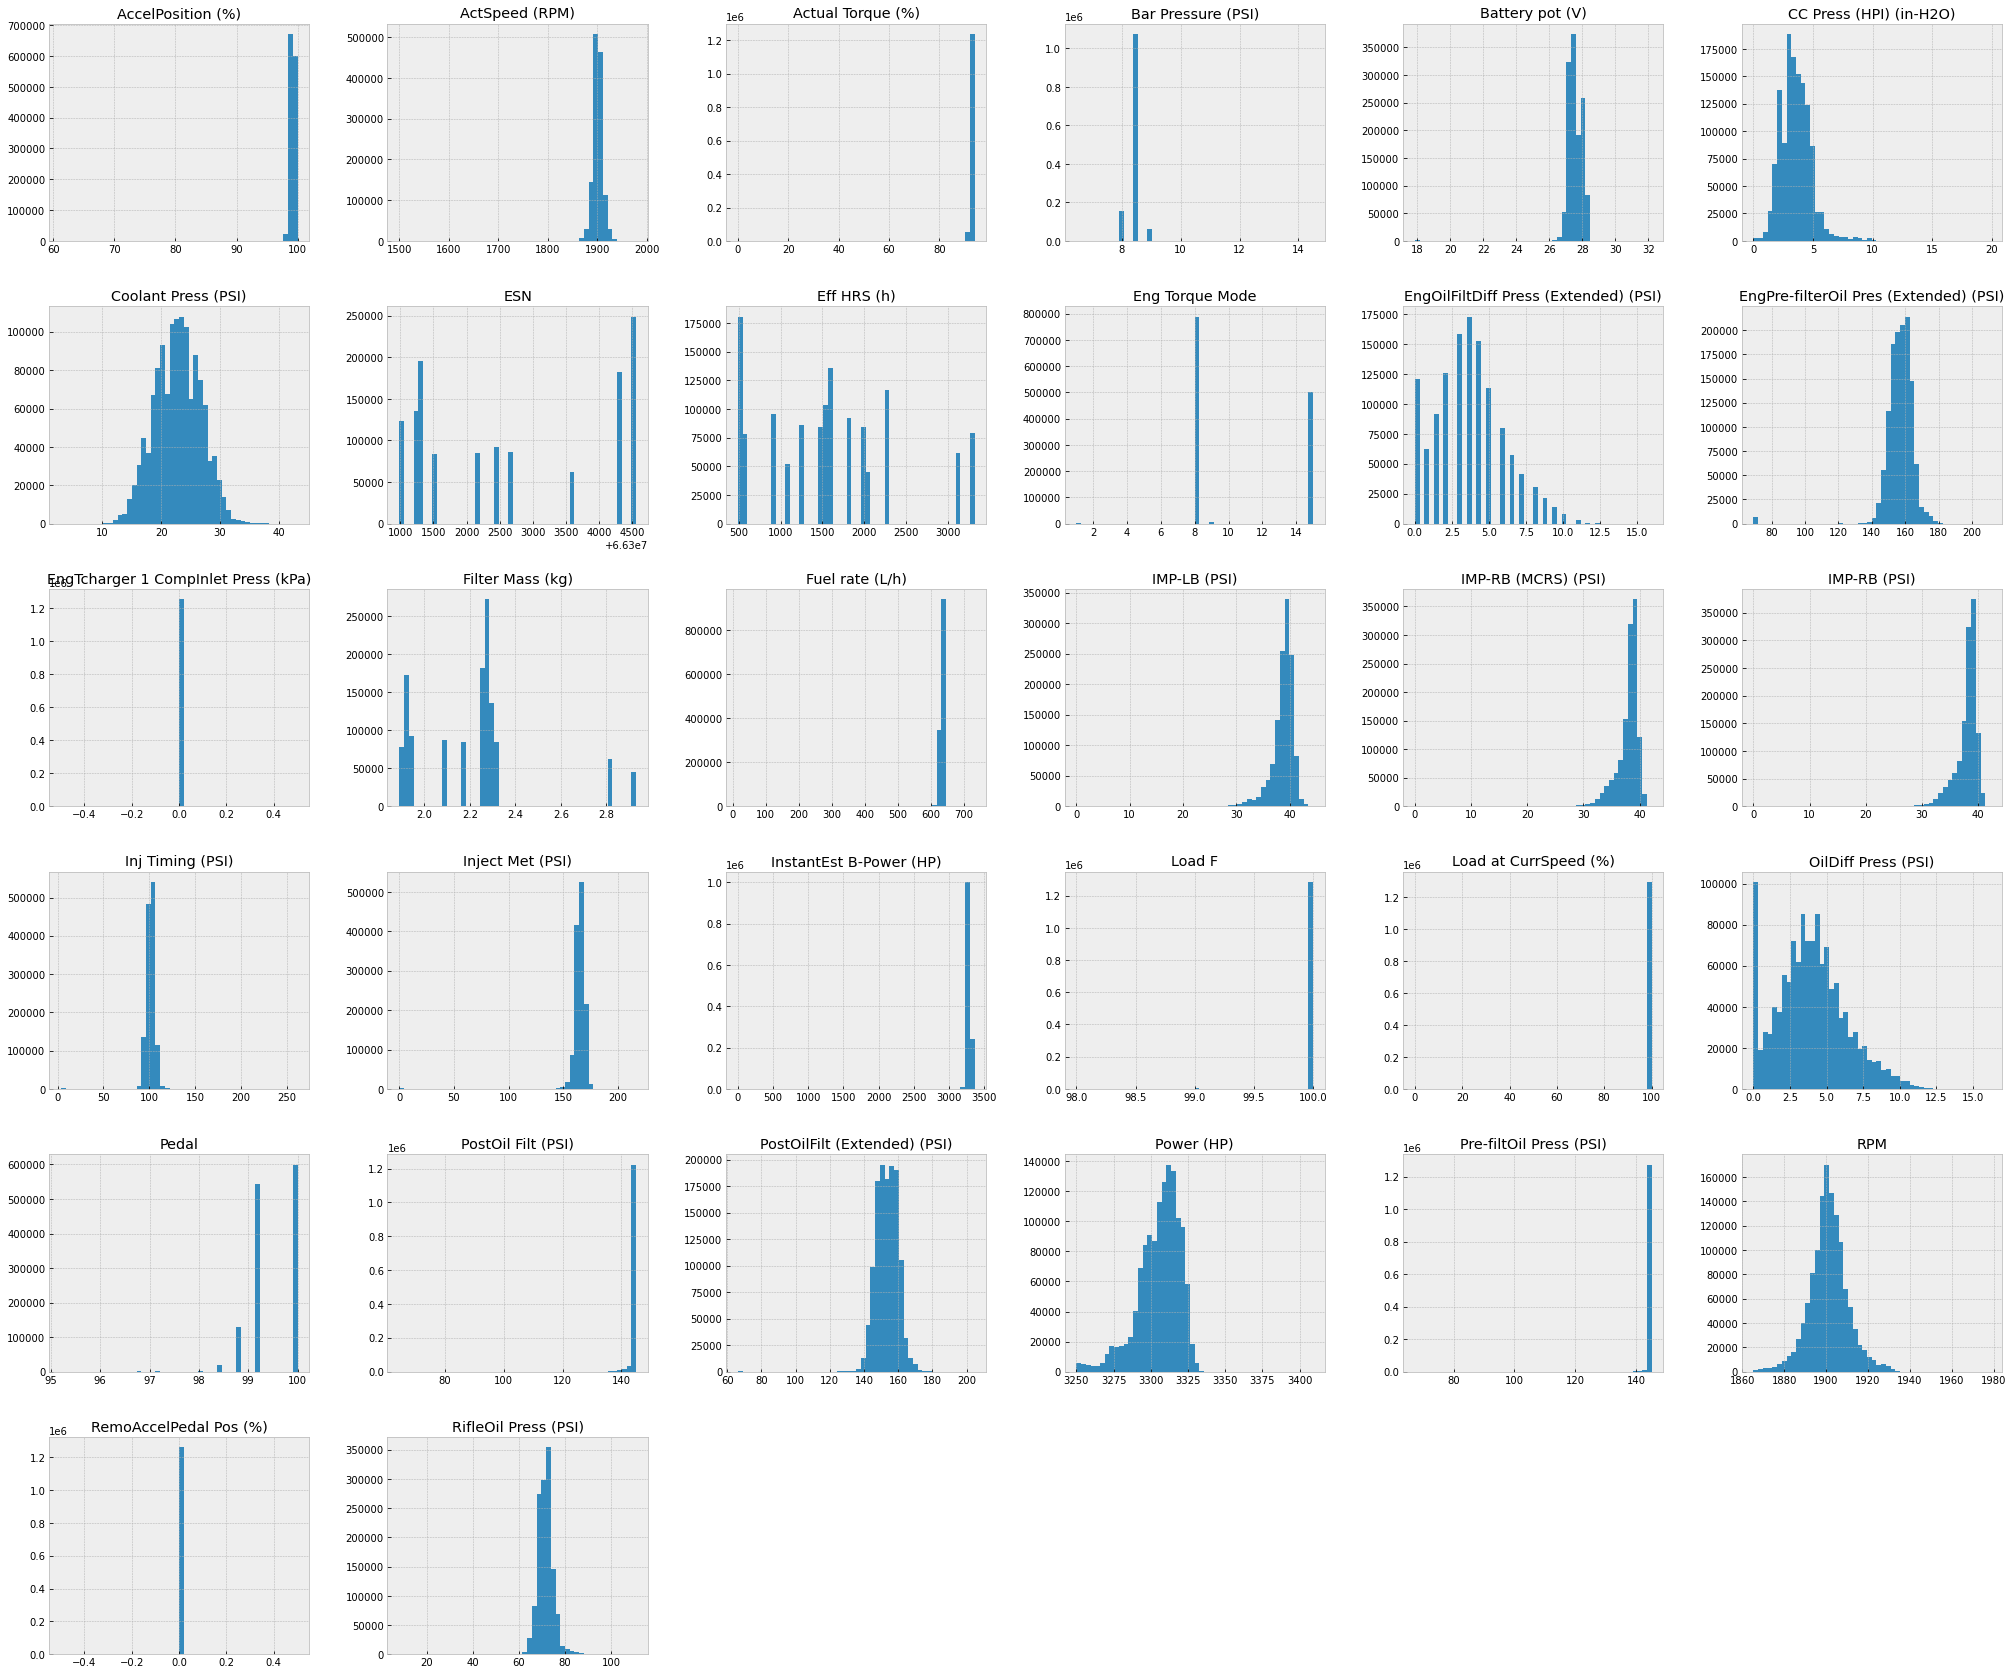

In [11]:
filt_df_massv.hist(bins=50, figsize=(35,30))
plt.show()

**Kurtosis**

In [12]:
filt_df_massv.kurtosis(axis=0, skipna=True)

ESN                                           -1.629814
RPM                                            1.312998
Pedal                                          0.631682
Load F                                       196.163611
Eng Torque Mode                               -1.748121
Actual Torque (%)                           1040.825205
ActSpeed (RPM)                                 5.178715
AccelPosition (%)                             46.377185
Load at CurrSpeed (%)                     168384.234726
Fuel rate (L/h)                             1284.227945
Bar Pressure (PSI)                            25.136968
IMP-LB (PSI)                                  32.020291
Battery pot (V)                              145.881810
Inject Met (PSI)                             188.904190
Inj Timing (PSI)                             124.170529
Pre-filtOil Press (PSI)                     4498.837199
InstantEst B-Power (HP)                     1002.011253
IMP-RB (PSI)                                  51

Both the skewness and the kurtosis are computed once for all the DFs because the data distribution is the same for each DF.

## **Data Correlation**: Filter Mass

Finally, a **correlation matrix** has been computed for each _filter mass_ by means of the standard correlation coefficient (also called _Pearson's r_) between every pair of attributes using the corr() method from the Pandas library.

The correlation coefficient ranges from 1 to -1. When it is close to 1, it means there is a strong positive correlation. On the other hand, when the coefficients is close to -1, it means that there is a strong negative correlation.

In [13]:
corr_matrix = filt_df_massv.corr(method='pearson')

The correlation matrix has been applied to every filter mass against every other attribute

In [14]:
%time corr_matrix["Filter Mass (kg)"].sort_values(ascending=False)

Wall time: 946 µs


Filter Mass (kg)                          1.000000
Eff HRS (h)                               0.348691
Coolant Press (PSI)                       0.154744
IMP-RB (PSI)                              0.108799
IMP-RB (MCRS) (PSI)                       0.106985
Battery pot (V)                           0.086079
Eng Torque Mode                           0.065676
IMP-LB (PSI)                              0.065559
EngOilFiltDiff Press (Extended) (PSI)     0.063954
OilDiff Press (PSI)                       0.062081
RifleOil Press (PSI)                      0.040238
PostOil Filt (PSI)                        0.011682
PostOilFilt (Extended) (PSI)              0.009107
EngPre-filterOil Pres (Extended) (PSI)    0.007362
Inject Met (PSI)                          0.004301
Actual Torque (%)                         0.002718
Power (HP)                                0.002337
ActSpeed (RPM)                           -0.001088
RPM                                      -0.001123
Pre-filtOil Press (PSI)        

In [15]:
import seaborn as sns
def heat_map(corr_matrix):
    '''
    Function to plot a half heatmap in order to represent the correlation bewteen attributes ranging from 1 (strong positive correlation) to -1 
    (strong negative correlation).
    
    corr_matrix : Matrix which stores the correlation coefficients
    
    returns a lower triangular heatmap plot
    '''
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(14, 12))
        ax = sns.heatmap(corr_matrix, mask=mask, linewidths=.1, vmin=-1, vmax=1, square=True)
        return plt.show(ax)

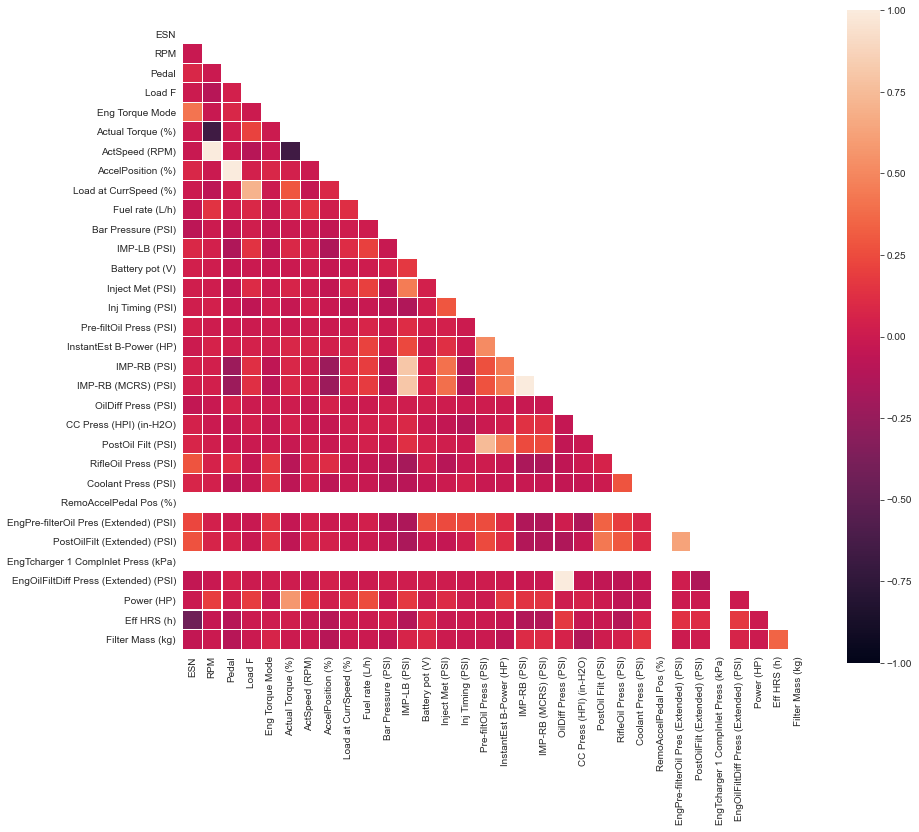

In [16]:
heat_map(corr_matrix)

### **Second Comparison**

In [17]:
cols2drop =['ESN','AVL','RPM', 'Pedal', 'Load F','Power','Eng Torque Mode', 
            'Actual Torque (%)', 'ActSpeed (RPM)', 'AccelPosition (%)',
           'Load at CurrSpeed (%)', 'Fuel rate (L/h)', 'Bar Pressure (PSI)',
           'IMP-LB (PSI)','Battery pot (V)','Inject Met (PSI)',
           'Inj Timing (PSI)', 'Pre-filtOil Press (PSI)',
           'InstantEst B-Power (HP)','IMP-RB (PSI)', 'IMP-RB (MCRS) (PSI)',
           'OilDiff Press (PSI)','CC Press (HPI) (in-H2O)',
           'EngOil Level (%)', 'PostOil Filt (PSI)', 'RifleOil Press (PSI)',
           'Coolant Press (PSI)', 'RemoAccelPedal Pos (%)',
           'EngPre-filterOil Pres (Extended) (PSI)',
           'PostOilFilt (Extended) (PSI)', 'EngOp State (bit)',
           'EngTcharger 1 CompInlet Press (kPa)', 'EngProSyst SD Eng (bit)',
           'EngProSyst App SD (bit)', 'EngProSys TS (bit)',
           'EngOilFiltDiff Press (Extended) (PSI)',
           'EngOilPrPump Control (bit)', 'EngControlled SD Request (bit)',
           'EngE (Immediate) SD Ind (bit)', 'Power (HP)']

In order to obtain a better inside about the correlation between the filter masses and the vital signs, a second comparison has been carried out. The attributes related to combustion have been considered for correlation

In [18]:
%%time
filt_df_massv2 = filt_df.drop(cols2drop, axis=1)
filt_df_massv2.shape

Wall time: 177 ms


(1295116, 36)

In [19]:
corr_matrix = filt_df_massv2.corr(method='pearson')

As before, the correlation matrix has been applied to every filter mass value against every attribute

In [20]:
%time corr_matrix["Filter Mass (kg)"].sort_values(ascending=False)

Wall time: 412 µs


Filter Mass (kg)    1.000000
Eff HRS (h)         0.348691
EGT-07 (F)          0.024871
EngOil T (F)       -0.034376
EGT-06 (F)         -0.059642
EGT-17 (F)         -0.062868
EGT-08 (F)         -0.073271
Coolant T (F)      -0.074039
EGT-18 (F)         -0.077212
EGT-03 (F)         -0.077946
EGT-05 (F)         -0.080837
EGT-13 (F)         -0.085669
IMT-LBM (F)        -0.086884
EGT-02 (F)         -0.088963
EGT-10 (F)         -0.095373
EGT-04 (F)         -0.109585
EGT-12 (F)         -0.115139
EGT-AV (F)         -0.118544
Ecu T (F)          -0.122552
EGT-11 (F)         -0.124928
EGT-14 (F)         -0.134035
IMT-RBF (F)        -0.137809
IMT-LBR (F)        -0.137827
EGT-15 (F)         -0.147152
EGT-09 (F)         -0.151416
EGT-16 (F)         -0.162537
IMT-RBM (F)        -0.171616
Ambient T (F)      -0.183835
IMT-LBF (F)        -0.183954
Fuel T (F)         -0.184561
EGT-01 (F)         -0.194793
IMT-RBR (F)        -0.233164
Name: Filter Mass (kg), dtype: float64

Heatmap to visualize the correlation between filter masses against every attribute related to combustion

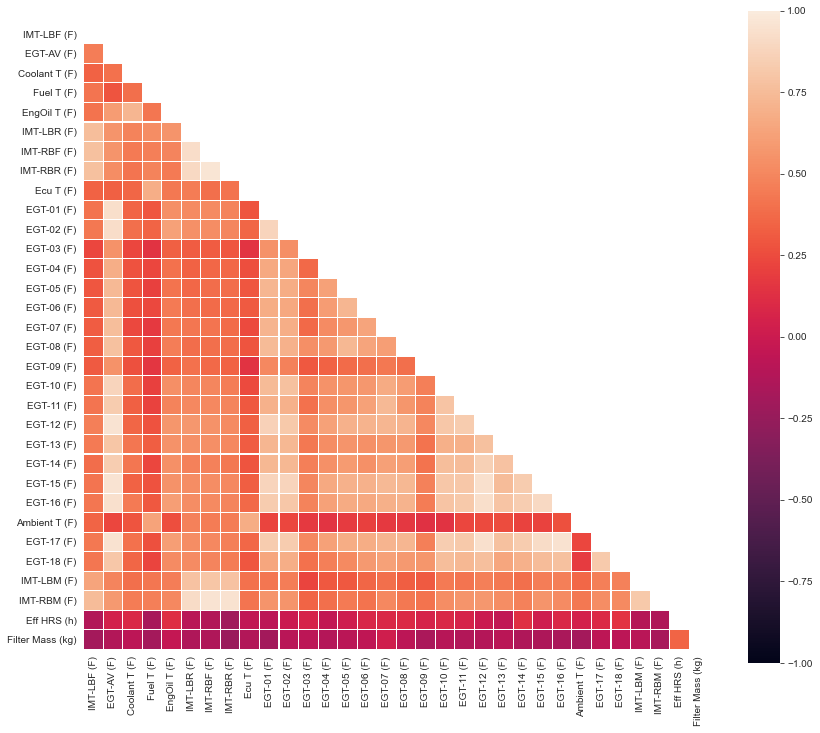

In [21]:
heat_map(corr_matrix)

From the above results, with regard to the correlation matrix it can be observed that there exist weak positive as well as negative correlations between the filter masses and the vital signs 

The another way that was implemented to check for correlation between attributes was using a **Pair Grid** plot or a **pandas scatter_matrix() function**, to plot every numerical attribute againts every other numerical attribute. The pair was performed focused on the attributes with higher positive and negative correlation values from the correlation matrix which were more correlated with the filter masses.

## **Conclusions**

* Regarding the correlation coefficients computed by the correlation matrix, it can be concluded that there is no correlation between the vital signs, attributes related with the combustion, and the filter masses
* Regarding the correlation coefficients computed by the correlation matrix, it can be concluded that there is no correlation between the  attributes related with operation and the filter masses
* From the _heatmap_ it can be observed there is a weak correlation between every numeric attribute with the filter masses